# **The Sparks Foundation** 

# **GRIPJUNE2021**

# **Task - 1 Prediction using Supervised Learning**

# by : Yash Moyal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading data
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## EDA

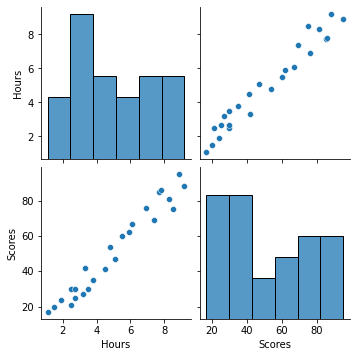

In [6]:
sns.pairplot(data)

Text(0, 0.5, 'percentage')

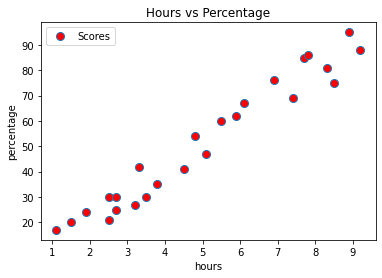

In [7]:
data.plot(x = 'Hours' , y = 'Scores', style = 'o', markersize=8, markerfacecolor='red')
plt.title('Hours vs Percentage')
plt.xlabel('hours')
plt.ylabel('percentage')

###  From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. 

<AxesSubplot:>

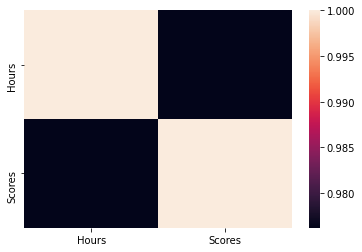

In [8]:
sns.heatmap(data.corr())

## We can see the correleation is maximum in Scores and hours.

In [9]:
data.columns  # checking the columns name in data.

Index(['Hours', 'Scores'], dtype='object')

In [10]:
X = data[['Hours']] 
y = data['Scores']  

## Spliting the data in training set and test set using sklearn. 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Training the Linear regression model.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression() #creating the instance of linear regression model.

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
# print the intercept
print(lm.intercept_)

2.370815382341881


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Hours,9.788567


### Holding all other features fixed, a 1 unit increase in Hours is associated with an *increase of  9.7 in Scores.

## Predictions

In [18]:
predictions = lm.predict(X_test)

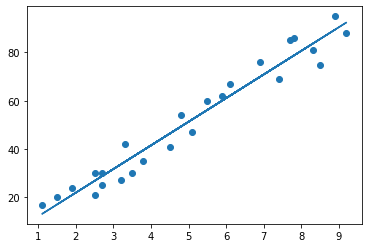

In [19]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [20]:
y_pred = lm.predict(X_test) # Predicting the scores

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})  
df 

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [22]:
# You can also test with your own data
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


## If a student studies 9.25 hrs/day its score(predicted) is 92.91.

## Model Evaluation

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652
